# Movie Recommendation System - Hulu
![3bc2f36497f3f66074ba25515128e0d8](https://github.com/user-attachments/assets/a07857a2-3bff-4ace-b509-b20254ed3717)

## Introduction
In today’s highly competitive streaming landscape, personalized movie recommendations play a crucial role in user engagement and retention. Hulu, which holds 11% of the market share in the streaming industry, is looking to upgrade its current movie recommendation algorithm. The aim of this project is to develop a machine learning model that provides users with the top 5 movie recommendations based on their previous ratings of other movies.

Our audience for this project is the Hulu Technology Team, headed by the CTO of Hulu.This project will explore an enhanced algorithm to improve the quality of recommendations for Hulu subscribers.
## Main Objective:

- To build a movie recommendation model that can provide the top 5 movie recommendations to a user based on their previous ratings. The model is aimed at enhancing Hulu's current recommendation system.
  
## Data Understanding
The dataset used in this project was sourced from [Grouplens](https://grouplens.org/datasets/movielens/100k/), utilizing information from IMDb and TMDb. The data contains over 100,000 movie ratings provided by 610 different users for about 9,700 movies, collected over a time span from 1996 to 2018. Each user has reviewed at least 20 different movies.

While the full dataset consists of approximately 1.9 million ratings, this project focuses on a subset of 100,000 ratings due to time constraints.

### Key Features of the Dataset:
- User ID: A unique identifier for each user.
- Movie ID: A unique identifier for each movie.
- Ratings: A score from 0.5 to 5.0 given by a user for a movie.
- Timestamp: The time when the rating was provided.
- Movie Metadata: Information about the movies, such as title and genres.
This data is crucial for building a collaborative filtering model that can predict which movies a user is likely to rate highly based on the behavior of similar users.


## Target accuracy threshold **(90/%)**

In [97]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 1.Data Exploration and  Cleaning

In [98]:
ratings_path = 'ratings.csv'
movies_path = 'movies.csv'
rt_df = pd.read_csv(ratings_path)
mv_df = pd.read_csv(movies_path)

### a. Movie Dataset

In [99]:
mv_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [100]:
mv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


The movies data set has **9742 rows** and **3 columns**, where each row represents one movie. 
 - **The first column** : movieId corresponds to a unique id that defines each movie in this dataset.
 - **The second column** : title contains the movie title which, in this case, is a combination of both the title of the movie and the year it was released.
 - **The final column** is genres and it contains the genres of the movie, some movies are tied to multiple genres. 

In [101]:
mv_df.title.duplicated().sum()

5

In [102]:
# Dropping the 5 duplicates
mv_df.drop_duplicates(subset='title', inplace=True)

In [103]:
len(mv_df)

9737

In [104]:
# Split title column into two new columns: Title and year 

mv_df['Title'] = mv_df['title'].str.split('(', n=1, expand=True)[0]

mv_df['year_released'] = mv_df['title'].str.split('(', n=1, expand=True)[1]

In [105]:
# Drop original column title

mv_df.drop(columns='title', inplace=True)


In [106]:
mv_df

,movieId,genres,Title,year_released
0,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995)
1,2,Adventure|Children|Fantasy,Jumanji,1995)
2,3,Comedy|Romance,Grumpier Old Men,1995)
3,4,Comedy|Drama|Romance,Waiting to Exhale,1995)
4,5,Comedy,Father of the Bride Part II,1995)
...,...,...,...,...
9737,193581,Action|Animation|Comedy|Fantasy,Black Butler: Book of the Atlantic,2017)
9738,193583,Animation|Comedy|Fantasy,No Game No Life: Zero,2017)
9739,193585,Drama,Flint,2017)
9740,193587,Action|Animation,Bungo Stray Dogs: Dead Apple,2018)


In [107]:
# Format year_released column

mv_df['year_released'] = mv_df.year_released.str.replace(')', '')

In [108]:
mv_df

,movieId,genres,Title,year_released
0,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995
1,2,Adventure|Children|Fantasy,Jumanji,1995
2,3,Comedy|Romance,Grumpier Old Men,1995
3,4,Comedy|Drama|Romance,Waiting to Exhale,1995
4,5,Comedy,Father of the Bride Part II,1995
...,...,...,...,...
9737,193581,Action|Animation|Comedy|Fantasy,Black Butler: Book of the Atlantic,2017
9738,193583,Animation|Comedy|Fantasy,No Game No Life: Zero,2017
9739,193585,Drama,Flint,2017
9740,193587,Action|Animation,Bungo Stray Dogs: Dead Apple,2018


In [109]:
# Changing the current format of genres to a list
mv_df['genres']=[row.strip().lower().replace('|',', ') for row in mv_df['genres']]

In [110]:
mv_df

,movieId,genres,Title,year_released
0,1,"adventure, animation, children, comedy, fantasy",Toy Story,1995
1,2,"adventure, children, fantasy",Jumanji,1995
2,3,"comedy, romance",Grumpier Old Men,1995
3,4,"comedy, drama, romance",Waiting to Exhale,1995
4,5,comedy,Father of the Bride Part II,1995
...,...,...,...,...
9737,193581,"action, animation, comedy, fantasy",Black Butler: Book of the Atlantic,2017
9738,193583,"animation, comedy, fantasy",No Game No Life: Zero,2017
9739,193585,drama,Flint,2017
9740,193587,"action, animation",Bungo Stray Dogs: Dead Apple,2018


### b. Ratings Dataset

In [111]:
rt_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


The ratings data frame has **100,836 rows** and **4 columns**, where each row is one rating given by a specific user to a specific movie. 
- **The first column** : (userId) corresponds to a unique id that identifies the specific user that rated the specific movie.
- **Second column**: (movieId). This movieId is the same identifying key that is present in the movies data frame.
- **The third column** represents the rating that a user gave the movie, on a 1-5 rating scale.
- **Lastly**, the final column corresponds to the date and time the rating was made, in the format of a UNIX timestamp.

In [112]:
# converted timestamp to datetime
rt_df['timestamp'] = pd.to_datetime(rt_df['timestamp'], unit='s')

In [113]:
# Checking for duplicates
rt_df.duplicated().sum()

0

In [114]:
# Checking for missing values
rt_df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

## Merging the Datasets (movies&ratings)

In [115]:
# merging rating and movies
movie_rating = mv_df.merge(rt_df, on='movieId', how='outer')

In [116]:
movie_rating

,movieId,genres,Title,year_released,userId,rating,timestamp
0,1,"adventure, animation, children, comedy, fantasy",Toy Story,1995,1.0,4.0,2000-07-30 18:45:03
1,1,"adventure, animation, children, comedy, fantasy",Toy Story,1995,5.0,4.0,1996-11-08 06:36:02
2,1,"adventure, animation, children, comedy, fantasy",Toy Story,1995,7.0,4.5,2005-01-25 06:52:26
3,1,"adventure, animation, children, comedy, fantasy",Toy Story,1995,15.0,2.5,2017-11-13 12:59:30
4,1,"adventure, animation, children, comedy, fantasy",Toy Story,1995,17.0,4.5,2011-05-18 05:28:03
...,...,...,...,...,...,...,...
100849,64997,NaN,NaN,NaN,68.0,2.5,2008-12-28 20:55:15
100850,144606,NaN,NaN,NaN,111.0,4.0,2018-01-31 23:27:37
100851,147002,NaN,NaN,NaN,318.0,4.0,2017-08-08 15:45:52
100852,26958,NaN,NaN,NaN,509.0,3.5,2015-07-04 17:42:33


In [117]:
movie_rating.dropna(inplace=True)

In [118]:
movie_rating

,movieId,genres,Title,year_released,userId,rating,timestamp
0,1,"adventure, animation, children, comedy, fantasy",Toy Story,1995,1.0,4.0,2000-07-30 18:45:03
1,1,"adventure, animation, children, comedy, fantasy",Toy Story,1995,5.0,4.0,1996-11-08 06:36:02
2,1,"adventure, animation, children, comedy, fantasy",Toy Story,1995,7.0,4.5,2005-01-25 06:52:26
3,1,"adventure, animation, children, comedy, fantasy",Toy Story,1995,15.0,2.5,2017-11-13 12:59:30
4,1,"adventure, animation, children, comedy, fantasy",Toy Story,1995,17.0,4.5,2011-05-18 05:28:03
...,...,...,...,...,...,...,...
100843,193581,"action, animation, comedy, fantasy",Black Butler: Book of the Atlantic,2017,184.0,4.0,2018-09-16 14:44:42
100844,193583,"animation, comedy, fantasy",No Game No Life: Zero,2017,184.0,3.5,2018-09-16 14:52:25
100845,193585,drama,Flint,2017,184.0,3.5,2018-09-16 14:56:45
100846,193587,"action, animation",Bungo Stray Dogs: Dead Apple,2018,184.0,3.5,2018-09-16 15:00:21


In [119]:
# Determine number of unique users
movie_rating['userId'].nunique()

610

- In this case, 610 unique users made 100813 ratings of 9737 movies.

Rating range: 0.5 to 5.0


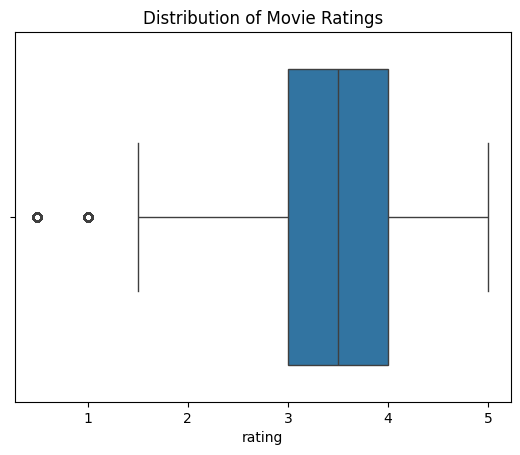

In [120]:
# Checking the range of ratings
print(f"Rating range: {movie_rating['rating'].min()} to {movie_rating['rating'].max()}")

# Checking for outliers using a boxplot
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=movie_rating['rating'])
plt.title('Distribution of Movie Ratings')
plt.show()


The boxplot shows that most movie ratings are clustered between 3.0 and 4.0, with a tendency toward higher ratings. The presence of a few outliers (ratings below 1.0) suggests that while most movies are rated favorably, there are some that receive notably low scores. However, since these outliers are within the valid rating range (0.5 to 5.0), they do not indicate data entry errors. Thus, no action is needed for these outliers in terms of data cleaning.

This analysis confirms that your rating data is generally well-distributed and falls within the expected range, which is a good sign for building a recommendation model.

In [121]:
# Normalize ratings by subtracting the mean rating for each user
user_mean_ratings = movie_rating.groupby('userId')['rating'].transform('mean')
movie_rating['normalized_rating'] = movie_rating['rating'] - user_mean_ratings

# Display first few rows to confirm the changes
movie_rating.head()


,movieId,genres,Title,year_released,userId,rating,timestamp,normalized_rating
0,1,"adventure, animation, children, comedy, fantasy",Toy Story,1995,1.0,4.0,2000-07-30 18:45:03,-0.366379
1,1,"adventure, animation, children, comedy, fantasy",Toy Story,1995,5.0,4.0,1996-11-08 06:36:02,0.363636
2,1,"adventure, animation, children, comedy, fantasy",Toy Story,1995,7.0,4.5,2005-01-25 06:52:26,1.269737
3,1,"adventure, animation, children, comedy, fantasy",Toy Story,1995,15.0,2.5,2017-11-13 12:59:30,-0.948148
4,1,"adventure, animation, children, comedy, fantasy",Toy Story,1995,17.0,4.5,2011-05-18 05:28:03,0.290476


The normalization process adjusts each user's movie ratings by subtracting their average rating. This centers ratings around zero, accounting for individual rating habits (e.g., generous or harsh raters).

Positive values in the normalized_rating column indicate movies rated higher than the user's average, while negative values show lower-than-average ratings. This normalization is key for collaborative filtering, as it allows the model to compare user preferences more accurately by removing individual biases in rating scales.

In [122]:
# Find movies with fewer than 10 ratings
movie_counts = movie_rating['Title'].value_counts()
movies_to_keep = movie_counts[movie_counts >= 10].index

# Filter the dataset to keep only these movies
movie_rating = movie_rating[movie_rating['Title'].isin(movies_to_keep)]

# Display the new shape of the dataset
print(f"Dataset shape after filtering: {movie_rating.shape}")


Dataset shape after filtering: (81847, 8)


Your dataset now has 81,847 rows and 8 columns after filtering out movies with fewer than 10 ratings. This step helps ensure that only movies with sufficient rating data are included, which is essential for building an effective collaborative filtering model. By removing movies with too few ratings, you provide the model with more reliable data to identify user preferences and similarities, improving the quality of the recommendations.

In [123]:
# Drop unnecessary columns
movie_rating.drop(columns=['timestamp'], inplace=True)


In [124]:
# Check for missing values
print(movie_rating.isna().sum())

# Confirm data types
print(movie_rating.dtypes)


movieId              0
genres               0
Title                0
year_released        0
userId               0
rating               0
normalized_rating    0
dtype: int64
movieId                int64
genres                object
Title                 object
year_released         object
userId               float64
rating               float64
normalized_rating    float64
dtype: object


In [125]:
import re

# Extract digits (years) using a regular expression and convert to numeric
movie_rating['year_released'] = movie_rating['year_released'].apply(lambda x: re.findall(r'\d{4}', x)[0] if re.findall(r'\d{4}', x) else None)

# Convert the column to an integer
movie_rating['year_released'] = pd.to_numeric(movie_rating['year_released'], errors='coerce').astype('Int64')

# Check if conversion was successful
movie_rating.dtypes


movieId                int64
genres                object
Title                 object
year_released          Int64
userId               float64
rating               float64
normalized_rating    float64
dtype: object

In [126]:
movie_rating['userId'] = movie_rating['userId'].astype(int)
movie_rating['year_released'] = movie_rating['year_released'].astype(int)


# 2. Exploratory Data Analysis (EDA)

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt


## Univariate Analysis

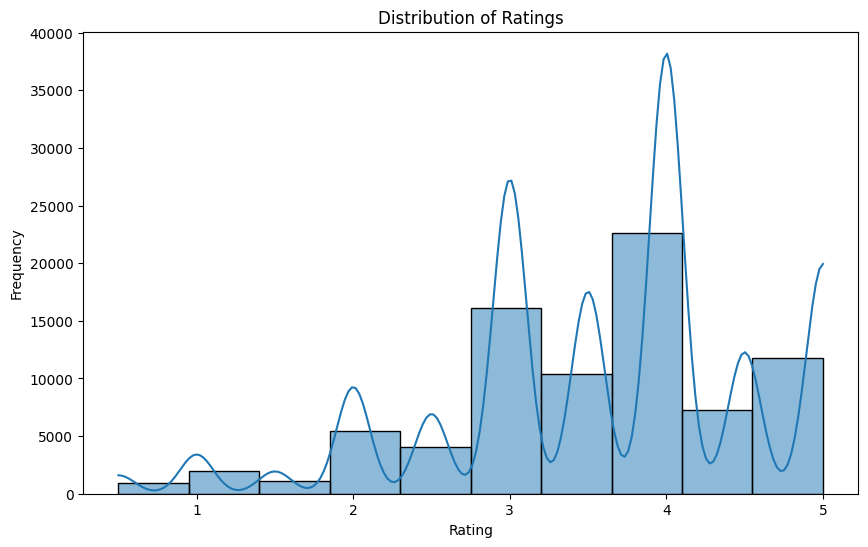

In [128]:
# Distribution of ratings
plt.figure(figsize=(10,6))
sns.histplot(movie_rating['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Distribution of Genres')

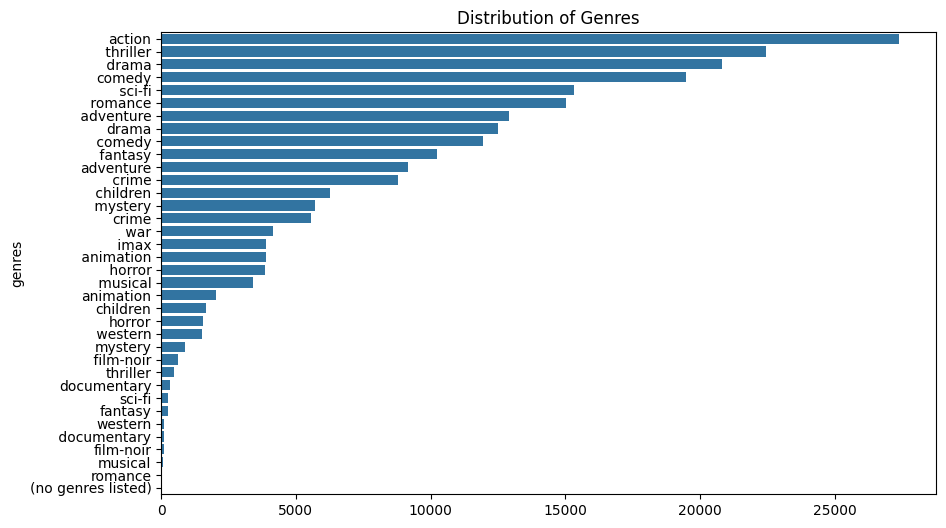

In [129]:
# Count of different genres
plt.figure(figsize=(10,6))
genres_count = movie_rating['genres'].apply(lambda x: x.split(',')).explode().value_counts()
sns.barplot(y=genres_count.index, x=genres_count.values)
plt.title('Distribution of Genres')

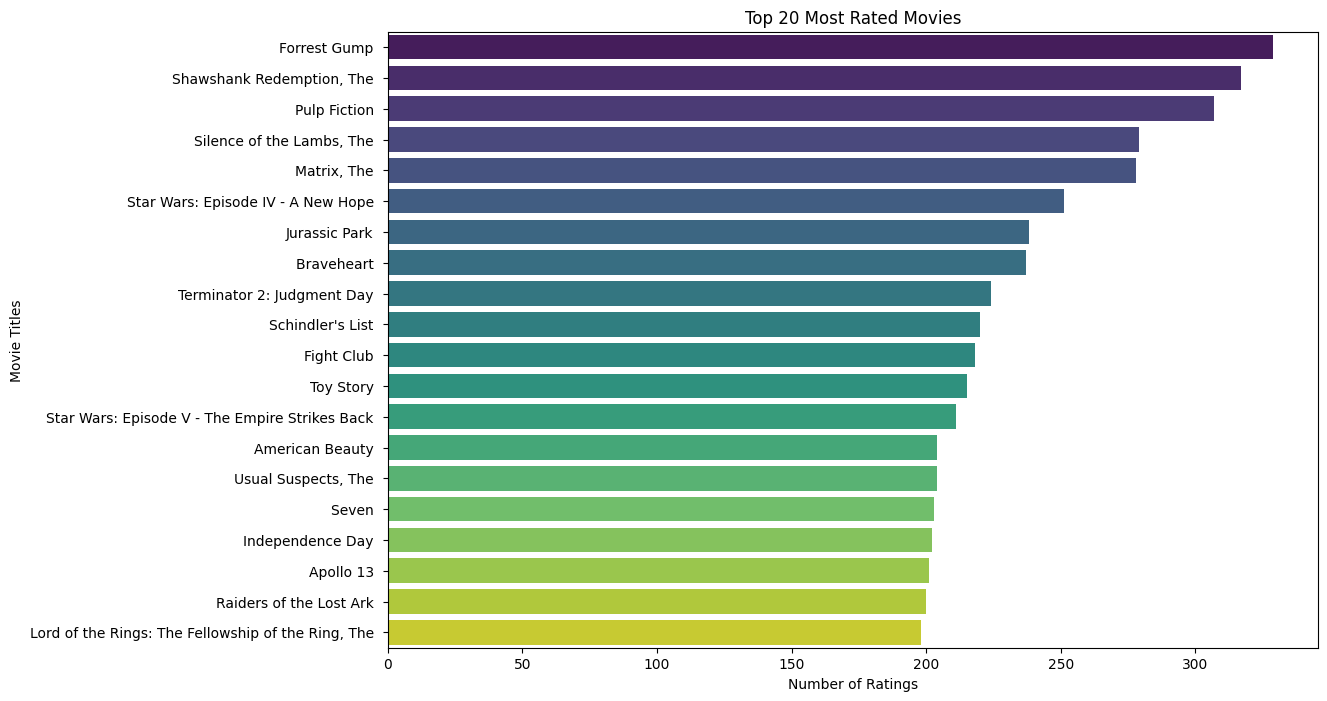

In [130]:
# Top 20 most rated movies
plt.figure(figsize=(12, 8))
top_20_movies = movie_rating['Title'].value_counts().head(20)
sns.barplot(y=top_20_movies.index, x=top_20_movies.values, palette='viridis')
plt.title('Top 20 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Titles')
plt.show()


The bar chart displays the top 20 most-rated movies in the dataset. The most rated movie is "Forrest Gump," followed closely by "The Shawshank Redemption" and "Pulp Fiction." This indicates that these movies are quite popular among users, receiving a high level of engagement.

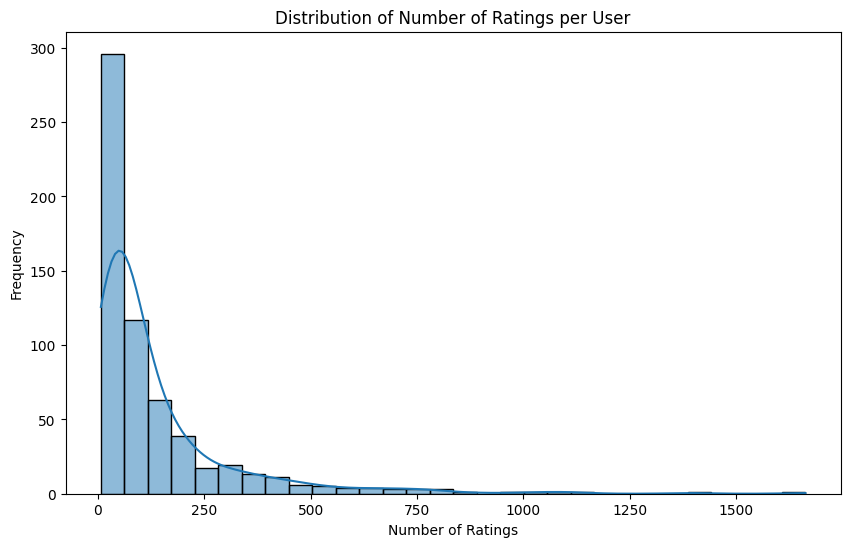

In [131]:
# Distribution of the number of ratings per user
plt.figure(figsize=(10, 6))
user_ratings_count = movie_rating['userId'].value_counts()
sns.histplot(user_ratings_count, bins=30, kde=True)
plt.title('Distribution of Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()


The histogram shows the distribution of the number of ratings given by each user. The plot is heavily right-skewed, indicating that the majority of users have rated only a small number of movies, while a few users have rated a large number of movies.

Most users appear to have given fewer than 200 ratings, with the highest frequency around users who rated fewer than 50 movies. This suggests that while some users are highly active, the majority are relatively less engaged. 

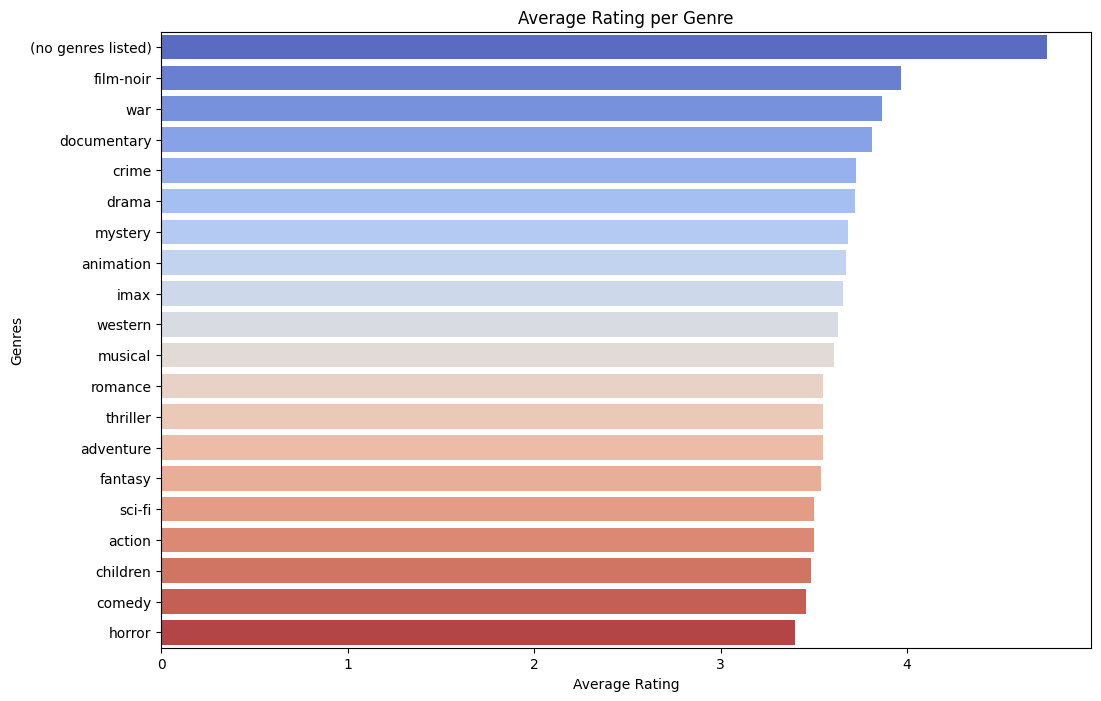

In [132]:
# Average rating for each genre
plt.figure(figsize=(12, 8))

# Explode genres into individual entries and repeat ratings accordingly
average_rating_per_genre = movie_rating.copy()
average_rating_per_genre['genres'] = average_rating_per_genre['genres'].apply(lambda x: x.split(', '))
average_rating_per_genre = average_rating_per_genre.explode('genres')

# Calculate the average rating for each genre
genre_avg_ratings = average_rating_per_genre.groupby('genres')['rating'].mean().sort_values(ascending=False)

# Plot the results
sns.barplot(y=genre_avg_ratings.index, x=genre_avg_ratings.values, palette='coolwarm')
plt.title('Average Rating per Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genres')
plt.show()


The bar chart shows that genres like "Film-Noir," "War," "Documentary," and "Crime" have the highest average ratings, indicating that users generally rate movies in these genres more favorably. This could reflect the quality of films in these categories or specific user preferences. Interestingly, the "(no genres listed)" category also has a high average rating, likely including unique cases or outliers.

In contrast, genres such as "Comedy," "Horror," and "Children" have lower average ratings, suggesting that users may be more critical of films in these categories. 

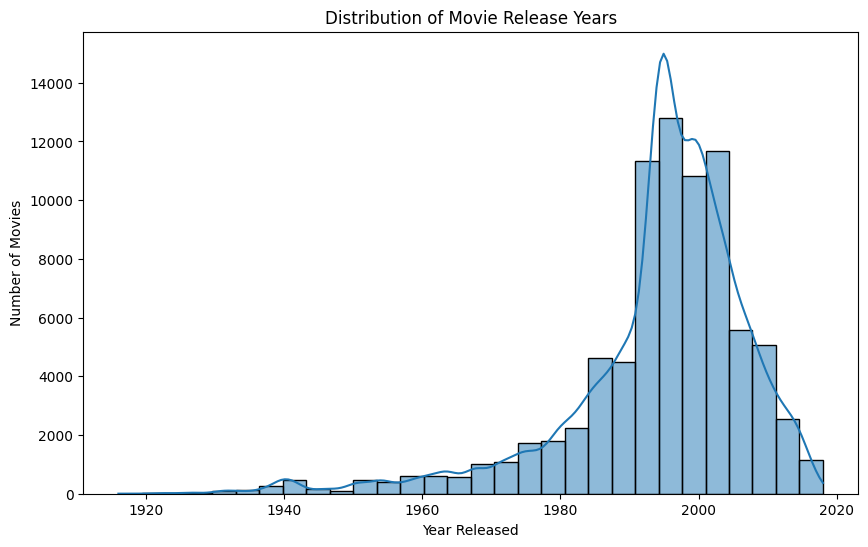

In [133]:
# Distribution of movie release years
plt.figure(figsize=(10, 6))
sns.histplot(movie_rating['year_released'], bins=30, kde=True)
plt.title('Distribution of Movie Release Years')
plt.xlabel('Year Released')
plt.ylabel('Number of Movies')
plt.show()


The histogram shows the distribution of movie release years in the dataset. There is a noticeable increase in the number of movies starting from the 1980s, with a sharp peak around the late 1990s and early 2000s. This suggests that the dataset contains more movies from recent decades, possibly reflecting the growth of the film industry and the increased accessibility of movies during these years.

After the 2000s, there is a gradual decline in the number of movies, potentially due to fewer entries for newer films or incomplete data for recent years. This distribution is important to consider when building the recommendation model, as it may affect the availability and diversity of movies suggested to users based on their release years.

## Bivariate Analysis

### Ratings vs. Release Year

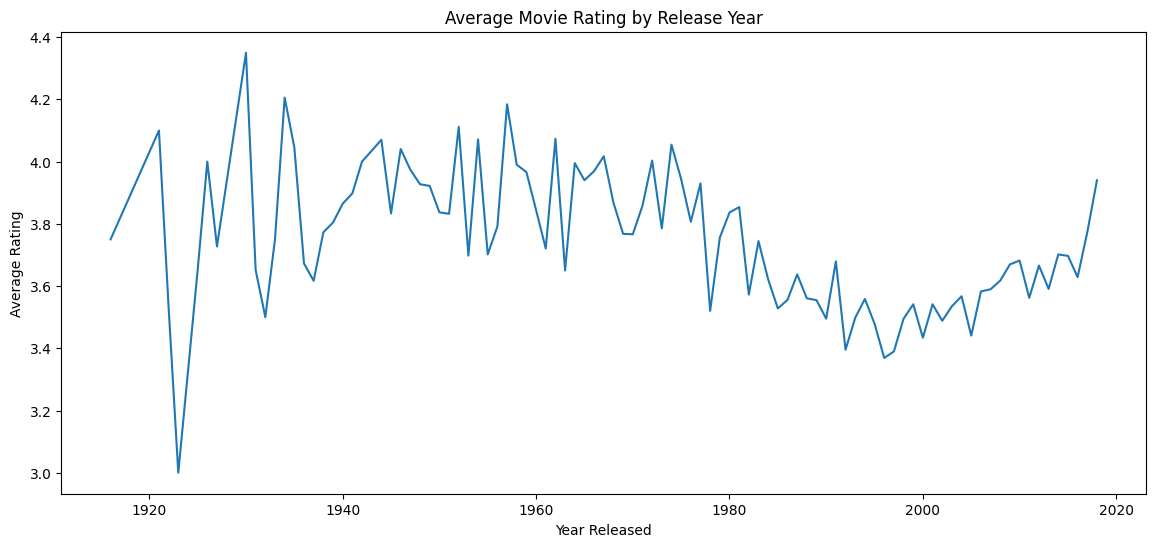

In [134]:
# Average rating per release year
plt.figure(figsize=(14, 6))
average_rating_per_year = movie_rating.groupby('year_released')['rating'].mean()
sns.lineplot(x=average_rating_per_year.index, y=average_rating_per_year.values)
plt.title('Average Movie Rating by Release Year')
plt.xlabel('Year Released')
plt.ylabel('Average Rating')
plt.show()


The line plot illustrates the average movie ratings over the years. The plot shows significant fluctuations in the earlier decades, particularly before the 1950s, likely due to the smaller number of movies and ratings during those years, which can cause variability in average ratings.

Post-1970, the average ratings display a gradual decline, stabilizing around the mid-3.0s in more recent years. However, there is a slight uptick in the average rating for movies released after 2010. This trend could be due to changing audience preferences or the availability of more movies in recent years.

### Ratings vs. Number of Ratings

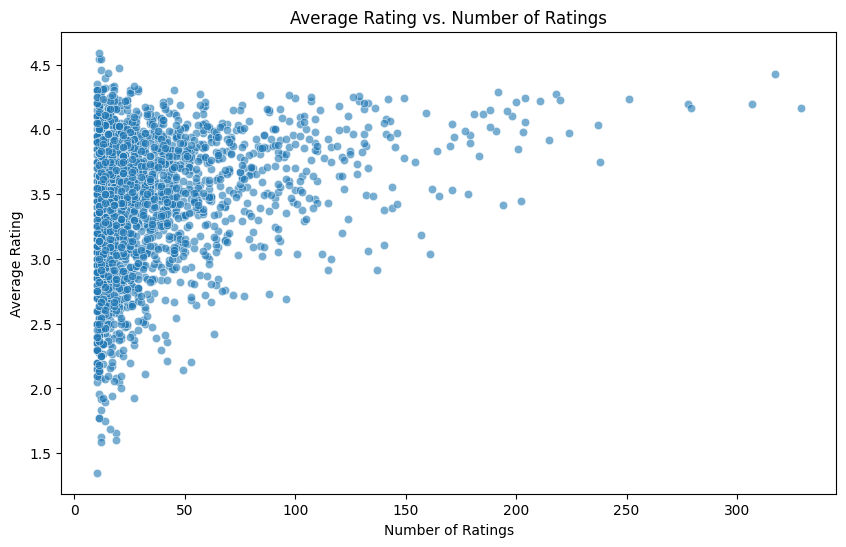

In [135]:
# Relationship between number of ratings and average rating for each movie
movie_avg_ratings = movie_rating.groupby('Title')['rating'].mean()
movie_num_ratings = movie_rating.groupby('Title')['rating'].count()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=movie_num_ratings, y=movie_avg_ratings, alpha=0.6)
plt.title('Average Rating vs. Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.show()


The scatter plot shows the relationship between the number of ratings a movie receives and its average rating. There is a noticeable concentration of movies with a low number of ratings (fewer than 50), and they exhibit a wide range of average ratings from 1.5 to 4.5. This suggests that less popular movies receive diverse opinions.

On the other hand, movies with a higher number of ratings (over 100) generally tend to have average ratings around 3.5 to 4.5. This trend indicates that more widely rated movies are typically rated more favorably, potentially reflecting their broad appeal or higher quality.

## Multivariate Analysis

### Heatmap of Correlations


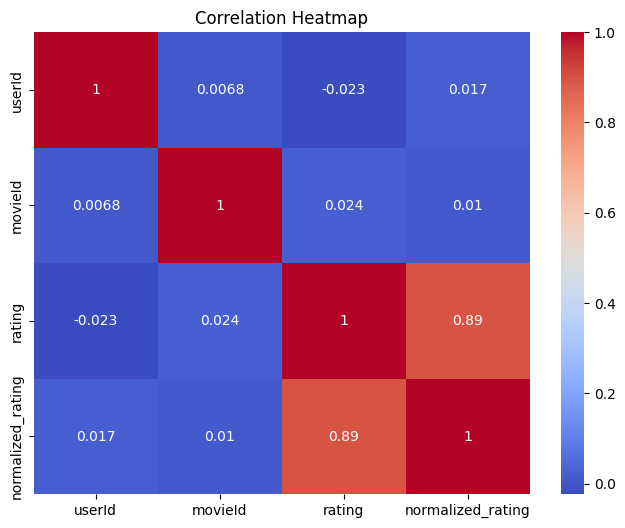

In [136]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(movie_rating[['userId', 'movieId', 'rating', 'normalized_rating']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


The correlation heatmap reveals a strong positive correlation (0.89) between rating and normalized_rating, which is expected since the normalized ratings are derived from the original ratings. This indicates that users’ individual rating patterns are well-preserved in the normalized values.

Other correlations, such as between userId, movieId, and rating, are close to zero, suggesting no significant linear relationship. This implies that user preferences and movie characteristics interact in more complex ways, which is typical in recommendation systems and underscores the need for collaborative filtering models.

# Modelling

## Encoding Genres

In [137]:
# One-hot encoding of genres
from sklearn.preprocessing import MultiLabelBinarizer

# Assuming the genres column has already been split
genres = movie_rating['genres'].str.split(',', expand=False)
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(genres)
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)

# Merging the one-hot encoded genres back to the original dataframe
movie_ratings = pd.concat([movie_rating, genres_df], axis=1)


**Surprise** is the main library we used to produce our **collaborative filtering model**.This library has endogenous methods of splitting our data set, cross validating, performing grid searches as well various different algorithms that can be used to build recommendation systems.

In [138]:
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import cross_validate,GridSearchCV
from surprise.prediction_algorithms import SVD, SVDpp, NMF, BaselineOnly,\
                                            NormalPredictor, KNNBasic
from sklearn.model_selection import train_test_split

### Loading the data in surprise format

In [139]:
# Define the format of the data
reader = Reader(rating_scale=(0.5, 5))

# Load data into Surprise's dataset structure
data = Dataset.load_from_df(movie_rating[['userId', 'movieId', 'rating']], reader)

from surprise.model_selection import train_test_split

# Split into training and test sets using Surprise's train_test_split
trainset, testset = train_test_split(data, test_size=0.2)


## 1. KNN MODEL

In [140]:
from surprise import KNNBasic

# KNN Model
knn_model = KNNBasic()

# Cross-validate and evaluate KNN model
knn_results = cross_validate(knn_model, data, measures=['RMSE'], cv=5, verbose=True)

# Fit the model on the trainset
knn_model.fit(trainset)

# Make predictions on the testset
predictions_knn = knn_model.test(testset)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9032  0.8971  0.9062  0.9065  0.9207  0.9067  0.0077  
Fit time          0.09    0.11    0.11    0.11    0.12    0.11    0.01    
Test time         0.81    0.83    0.81    0.82    0.83    0.82    0.01    
Computing the msd similarity matrix...
Done computing similarity matrix.


## 2. SVD Model

In [141]:
from surprise import SVD
from surprise.model_selection import cross_validate

# Build SVD model
svd_model = SVD()

# Cross-validate and evaluate SVD model
svd_results = cross_validate(svd_model, data, measures=['RMSE'], cv=5, verbose=True)

# Fit the model on the trainset
svd_model.fit(trainset)

# Make predictions on the testset
predictions = svd_model.test(testset)


Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8545  0.8492  0.8532  0.8546  0.8416  0.8506  0.0049  
Fit time          0.65    0.65    0.67    0.68    0.67    0.67    0.01    
Test time         0.09    0.08    0.08    0.08    0.19    0.10    0.04    


In [142]:
# Evaluation of the models
# Extract RMSE results
svd_rmse = svd_results['test_rmse'].mean()
knn_rmse = knn_results['test_rmse'].mean()

print(f"SVD RMSE: {svd_rmse}")
print(f"KNN RMSE: {knn_rmse}")

# Set a target RMSE threshold
target_rmse = 0.9

# Determine if any model meets the target RMSE
if svd_rmse > target_rmse:
    print("SVD model meets the target accuracy")
else:
    print("SVD model does not meet the target accuracy")

if knn_rmse > target_rmse:
    print("KNN model meets the target accuracy")
else:
    print("KNN model does not meet the target accuracy")


SVD RMSE: 0.8506266490463144
KNN RMSE: 0.9067290445058444
SVD model does not meet the target accuracy
KNN model meets the target accuracy


- Knn model seems to perform better than our SVD model

### Hyperparameter Tuning of our model

In [144]:
from surprise.model_selection import GridSearchCV

# SVD hyperparameter tuning
param_grid = {'n_factors': [50, 100, 200], 'lr_all': [0.002, 0.005, 0.01], 'reg_all': [0.02, 0.1]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs.fit(data)

# Get the best parameters and RMSE score
best_params_svd = gs.best_params['rmse']
best_rmse_svd = gs.best_score['rmse']

print(f"Best SVD Params: {best_params_svd}")
print(f"Best SVD RMSE: {best_rmse_svd}")


Best SVD Params: {'n_factors': 200, 'lr_all': 0.01, 'reg_all': 0.1}
Best SVD RMSE: 0.8449204643717945
